<a href="https://colab.research.google.com/github/Salma-hmitti/BigDataLabs/blob/master/CNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


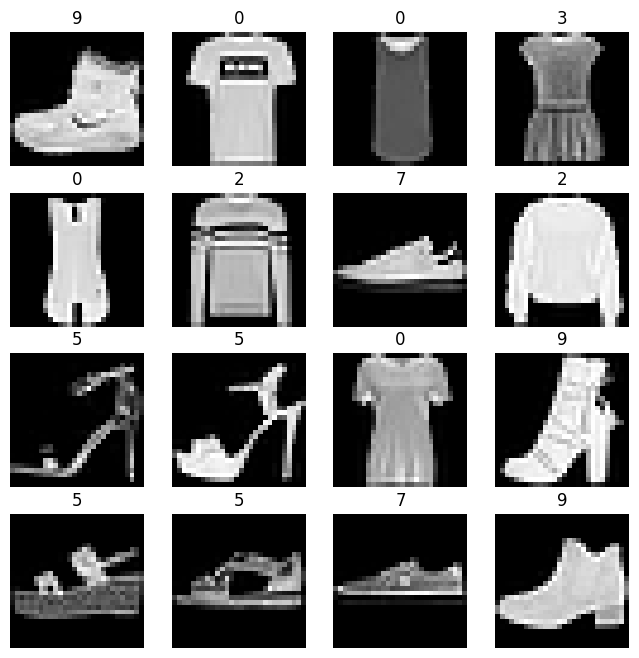

In [6]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(y_train[i])
  plt.axis('off')
plt.show()

In [7]:
model = models.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=10,  validation_data=(X_test,
y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 37ms/step - accuracy: 0.6902 - loss: 1.3188 - val_accuracy: 0.8458 - val_loss: 0.4162
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 41ms/step - accuracy: 0.8348 - loss: 0.4621 - val_accuracy: 0.8609 - val_loss: 0.3856
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.8575 - loss: 0.3936 - val_accuracy: 0.8685 - val_loss: 0.3547
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.8699 - loss: 0.3611 - val_accuracy: 0.8759 - val_loss: 0.3454
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.8752 - loss: 0.3362 - val_accuracy: 0.8837 - val_loss: 0.3144
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.8797 - loss: 0.3222 - val_accuracy: 0.8839 - val_loss: 0.3257
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 35ms/step - accuracy: 0.8862 - loss: 0.3087 - val_accuracy: 0.8894 - val_loss: 0.3067
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.8894 -

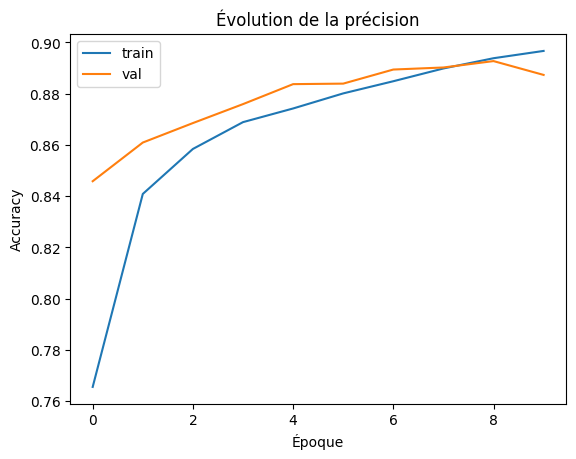

In [10]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Évolution de la précision')
plt.xlabel('Époque')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Précision sur les données de test : {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8836 - loss: 0.3244
Précision sur les données de test : 0.8873


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


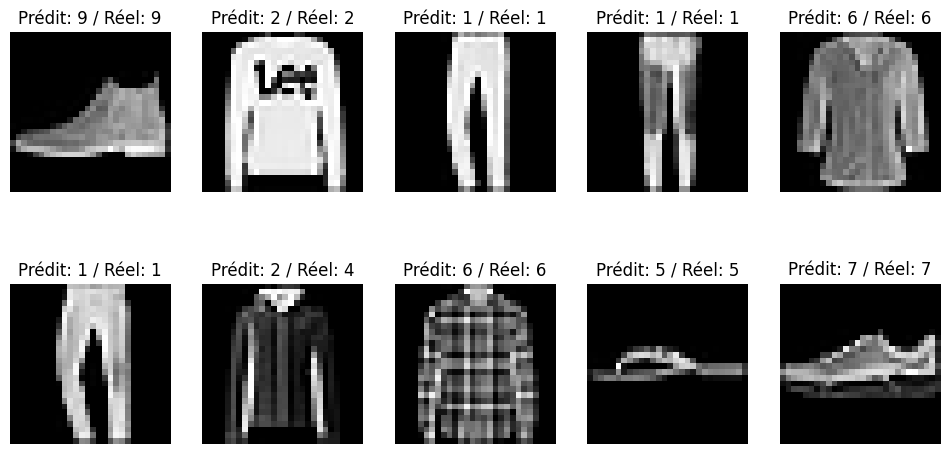

In [12]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
plt.figure(figsize=(12,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap='gray')
  plt.title(f"Prédit: {y_pred[i]} / Réel: {y_test[i]}")
  plt.axis('off')
plt.show()